<a href="https://colab.research.google.com/github/wanwanliang/ML_Practices/blob/main/Chapter8_Dimension_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info >= (3,5)

import sklearn
assert sklearn.__version__ >= '0.20'

import numpy as np
import os
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### Build 3D Dataset

In [ ]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1



angles = np.random.rand(m)*3*np.pi/2 - 0.5
X = np.empty((m,3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise*np.random.randn(m)/2
X[:, 1] = np.sin(angles)*0.7 + noise*np.random.randn(m)/2
X[:, 2] = X[:, 0]* w1 + X[:, 1]*w2 + noise*np.random.randn(m)

## PCA using SVD decomposition

In [ ]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [ ]:
m, n = X.shape
S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [ ]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [ ]:
X_centered[:5,]

array([[-1.03976771e+00, -7.60238460e-01, -3.32880482e-01],
       [-3.17841939e-02,  3.90260570e-01, -3.64766659e-02],
       [-9.77238797e-01, -6.73862060e-01, -3.20757101e-01],
       [-9.44190485e-01,  7.70779228e-04, -4.97304144e-02],
       [-7.87164831e-01, -5.10641487e-02,  1.19970744e-01]])

In [ ]:
ts = U.dot(S).dot(Vt)
ts[:5,]

array([[-1.03976771e+00, -7.60238460e-01, -3.32880482e-01],
       [-3.17841939e-02,  3.90260570e-01, -3.64766659e-02],
       [-9.77238797e-01, -6.73862060e-01, -3.20757101e-01],
       [-9.44190485e-01,  7.70779228e-04, -4.97304144e-02],
       [-7.87164831e-01, -5.10641487e-02,  1.19970744e-01]])

In [ ]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
X2D_using_svd = X2D

## PCA with Scikit-Learn

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [ ]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [ ]:
X3D_inv = pca.inverse_transform(X2D)
X3D_inv[:5]

array([[-1.01450604, -0.54656333, -0.27441525],
       [-0.02103231,  0.55108376,  0.18101894],
       [-0.95379477, -0.4668077 , -0.24237013],
       [-0.91717404,  0.22083765, -0.01049779],
       [-0.74607229,  0.22027492,  0.00492637]])

In [ ]:
X[:5]

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496]])

In [ ]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

## PCA on MNIST Dataset

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [ ]:
from sklearn.model_selection import train_test_split

X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,)

In [ ]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

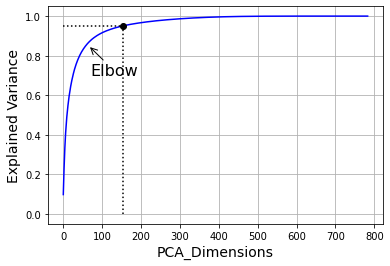

In [ ]:
plt.plot(cumsum, "b-")
plt.grid(True)
plt.plot([d,d], [0, 0.95], "k:")
plt.plot([0,d],[0.95,0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.xlabel("PCA_Dimensions", fontsize=14)
plt.ylabel("Explained Variance", fontsize=14)
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.show()

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)
print(X_reduced.shape)
print(X_recovered.shape)

(52500, 154)
(52500, 784)


In [ ]:
def plot_images(instances,size=28, image_per_row=5):

  image_per_row = min(len(instances), image_per_row)
  n_row = len(instances)//image_per_row +1
  n_empty = image_per_row * n_row - len(instances)

  np_list = [img.reshape(size, size) for img in instances]
  np_list.append(np.zeros((size, size*n_empty)))
  image_by_row = []

  for i in range(n_row):
    image_by_row.append(np.concatenate(np_list[i*image_per_row:(i+1)*image_per_row], axis=1))
  
  image = np.concatenate(image_by_row, axis=0)
  
  plt.imshow(image, cmap=mpl.cm.binary)
  plt.axis('off')

Text(0.5, 1.0, 'Compressed Data')

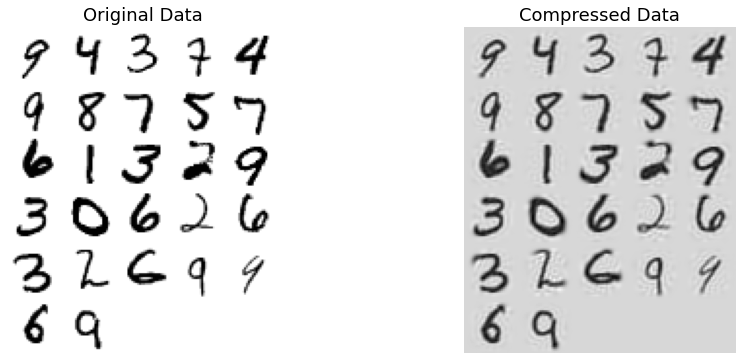

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plot_images(X_train[0:27], size=28, image_per_row=5)
plt.title("Original Data", fontsize=18)
plt.subplot(122)
plot_images(X_recovered[0:27], size=28, image_per_row=5)
plt.title("Compressed Data", fontsize=18)

## Incremental PCA

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

n=0
for X_batch in np.array_split(X_train, n_batches):
  n = n+1
  print("Batch {}".format(n))
  inc_pca.partial_fit(X_batch)

Batch 1
Batch 2
Batch 3
Batch 4
Batch 5
Batch 6
Batch 7
Batch 8
Batch 9
Batch 10
Batch 11
Batch 12
Batch 13
Batch 14
Batch 15
Batch 16
Batch 17
Batch 18
Batch 19
Batch 20
Batch 21
Batch 22
Batch 23
Batch 24
Batch 25
Batch 26
Batch 27
Batch 28
Batch 29
Batch 30
Batch 31
Batch 32
Batch 33
Batch 34
Batch 35
Batch 36
Batch 37
Batch 38
Batch 39
Batch 40
Batch 41
Batch 42
Batch 43
Batch 44
Batch 45
Batch 46
Batch 47
Batch 48
Batch 49
Batch 50
Batch 51
Batch 52
Batch 53
Batch 54
Batch 55
Batch 56
Batch 57
Batch 58
Batch 59
Batch 60
Batch 61
Batch 62
Batch 63
Batch 64
Batch 65
Batch 66
Batch 67
Batch 68
Batch 69
Batch 70
Batch 71
Batch 72
Batch 73
Batch 74
Batch 75
Batch 76
Batch 77
Batch 78
Batch 79
Batch 80
Batch 81
Batch 82
Batch 83
Batch 84
Batch 85
Batch 86
Batch 87
Batch 88
Batch 89
Batch 90
Batch 91
Batch 92
Batch 93
Batch 94
Batch 95
Batch 96
Batch 97
Batch 98
Batch 99
Batch 100


In [ ]:
X_reduced = inc_pca.transform(X_train)
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

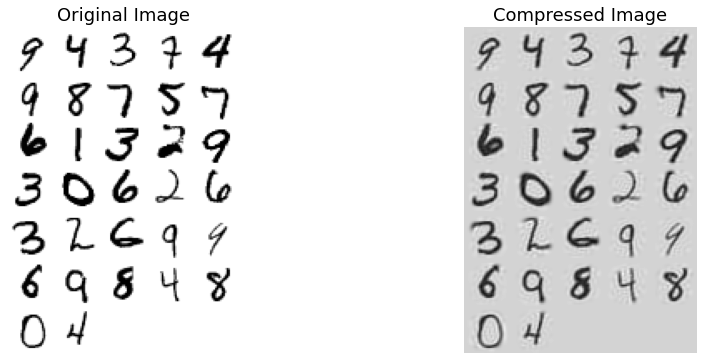

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plot_images(X_train[:32])
plt.title("Original Image", fontsize=18)
plt.subplot(122)
plot_images(X_recovered_inc_pca[:32])
plt.title("Compressed Image", fontsize=18)
plt.show()

In [ ]:
np.allclose(pca.mean_, inc_pca.mean_)

True

In [ ]:
np.allclose(X_recovered_inc_pca, X_recovered)

False

## Manifold learning

In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [ ]:
print(t.shape)
print(X.shape)
print(X[:5])
print(t[:5])

(1000,)
(1000, 3)
[[-3.29677117  4.26198454  7.69787682]
 [ 5.95972743 11.45784273 12.72625276]
 [ 6.66051523 18.15820401 -9.84713337]
 [-6.11824123 15.48364843 -8.30589399]
 [ 6.33443886 16.41063456 -0.4913301 ]]
[ 8.24234644 13.67266022 11.61126935 10.35461227  6.18283002]


In [ ]:
pd.DataFrame(X).describe()

,0,1,2
count,1000.000000,1000.000000,1000.000000
mean,2.004806,10.647835,0.154515
std,6.571050,6.149676,6.913291
min,-9.919520,-0.144537,-11.416802
25%,-3.386741,5.106111,-4.763130
50%,3.317279,10.890549,-0.511495
75%,6.315301,15.915352,6.430505
max,12.928036,21.176402,14.360618


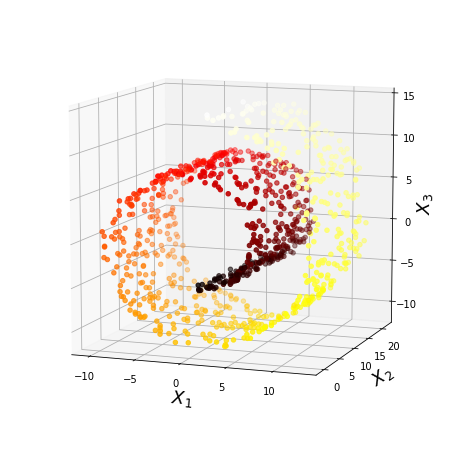

In [ ]:
axes = [-11.5, 14, -2, 23, -12, 15]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel('$X_1$', fontsize=18)
ax.set_ylabel('$X_2$', fontsize=18)
ax.set_zlabel('$X_3$', fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

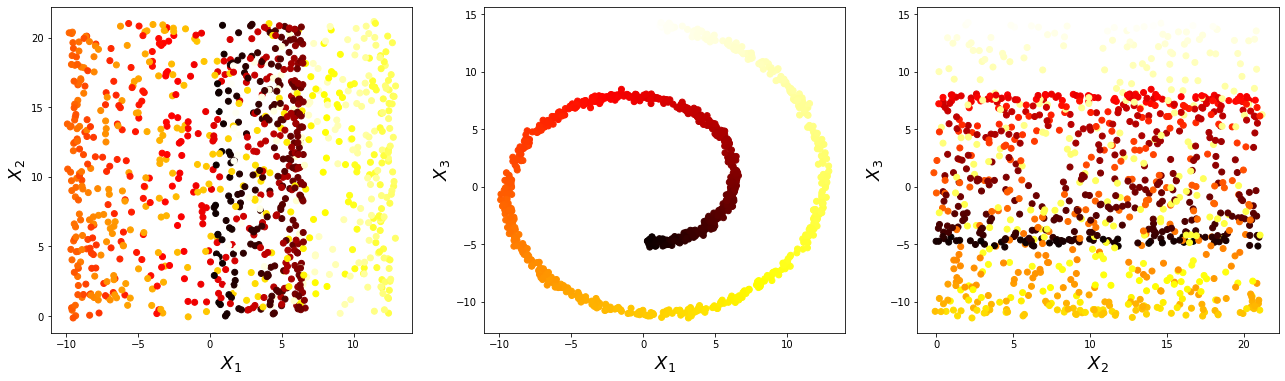

In [ ]:
plt.figure(figsize=(22,6))

plt.subplot(131)
plt.scatter(X[:,0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel('$X_1$', fontsize=18)
plt.ylabel('$X_2$', fontsize=18)

plt.subplot(132)
plt.scatter(X[:,0], X[:, 2], c=t, cmap=plt.cm.hot)
plt.xlabel('$X_1$', fontsize=18)
plt.ylabel('$X_3$', fontsize=18)

plt.subplot(133)
plt.scatter(X[:,1], X[:, 2], c=t, cmap=plt.cm.hot)
plt.xlabel('$X_2$', fontsize=18)
plt.ylabel('$X_3$', fontsize=18)

plt.show()

## Kernel PCA

In [ ]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel='rbf', gamma=0.04)
rbf_reduced = rbf_pca.fit_transform(X)

In [ ]:
lin_pca = KernelPCA(n_components=2, kernel='linear', fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001, coef0=1 , fit_inverse_transform=True)

In [ ]:
ts = lin_pca.fit_transform(X)
ts.shape
ts= lin_pca.inverse_transform(ts)
ts.shape

(1000, 3)

In [ ]:
def pca_plot(X, pca, ylab, title):
  ft = pca.fit_transform(X)

  plt.scatter(ft[:,0], ft[:,1], c=t, cmap=plt.cm.hot)
  plt.grid(True)
  plt.xlabel("$Z_1$", fontsize=16)
  plt.title(title, fontsize=18)
  if ylab:
    plt.ylabel("$Z_2$", fontsize=16)

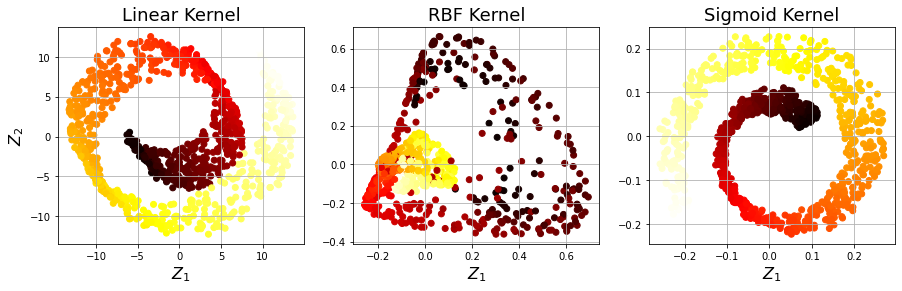

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(131)
pca_plot(X, lin_pca, ylab=True, title="Linear Kernel")
plt.subplot(132)
pca_plot(X, rbf_pca, ylab=False, title="RBF Kernel")
plt.subplot(133)
pca_plot(X, sig_pca, ylab=False, title="Sigmoid Kernel")
plt.show()